In [1]:
import numpy as np
import networkx as nx
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pkuseg
import itertools
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import pkuseg
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# 加载预训练的 Word2Vec 模型
model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

In [9]:
for key, value in model.most_similar('GdScO_3', topn=100000):
    print(key)

/La_07Sr_03MnO_3
c-sapphire
350-nm-thick
NbSTO
TiO_2-terminated
40-nm-thick
Pt/TiO_2/SiO_2/Si
scandate
LaSrGaO_4
TGZO
Bi_085Yb_015FeO_3
SrBi_2Nb_2O_9
-MgO
CaBi_4Ti_4O_15
p^+-Si
homoepitaxially
Mg_xZn_1-xO
/SrTiO_3
TZO
BFCO
RF-magnetron
a-CIZO
Zn_3Sn_2O_7
/TiO_2/SiO_2/Si
CeO_2-buffered
Nd_07Sr_03MnO_3
well-cleaned
EBCO
Sr_2AlTaO_6
K_05Bi_45Ti_4O_15
Ba_05Sr_05Nb_2O_6
BLTV
6-nm-thick
BaTiO_3/SrTiO_3
heterostuctures
PrGaO_3
NSTO
fs-PLD
heteroepitaxially
rf-magnetron
Bi_325La_075Ti_3O_12
α-Ga_2O_3
SrTi0_3
AlN/Si
singlecrystalline
corning
20-nm-thick
TiO_2/Ag/TiO_2
SLGO
Ba_02Sr_08TiO_3
layer-deposited
DC-magnetron
a-TaN_
LSAT
PrBa_2Cu_3O_7-δ
LHMO
highly-textured
Ba_07Sr_03TiO_3
R-plane
indium-oxide
p-silicon
nonorienting
IBAD-MgO
ZnSnLiO
SrLaGaO_4
Y_1Ba_2Cu_3O_7-x
HfO_x
Ni_75Fe_25
ITO/glass
300-nm-thick
FTO/glass
400-nm-thick
CaF_2/Si
HfN_x
25-nm-thick
ion-damaged
Si-substrates
-SrTiO_3
LSGO
2Pr
CeYIG
/SiO_2/Si
PLT10
Ba_xSr_1−
lOO
poly-crystal
/silicon
HAZO
YBFO
Al/ZnO
FTO-coated
CBTi144
SiC

In [12]:
similarity_score = model.similarity('MAPbI_3', 'photovoltaic')
print(similarity_score)
# 0.5714197  MAPbI3
# 
# 0.42261833  GdScO3

0.5714197


In [107]:
similarity_score = model.similarity('dipoles', 'toluene')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'NMP')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'methanol')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'acetate')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'benzylalcohol')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'butylamine')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'acid-ethyl')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'GBL')
print(similarity_score)
similarity_score = model.similarity('dipoles', 'Acetonitrile')
print(similarity_score)
similarity_score = model.similarity('dipoles', '12-propanediol')
print(similarity_score)


0.12961613
0.19213136
0.09467515
0.07566323
0.16216591
0.24269523
0.13139553
0.2390289
0.15214379
0.07873218


In [108]:
similarity_score = model.similarity('exciton', 'hexane')
print(similarity_score)
similarity_score = model.similarity('exciton', 'octane')
print(similarity_score)
similarity_score = model.similarity('exciton', 'IPA')
print(similarity_score)
similarity_score = model.similarity('exciton', 'alcohol')
print(similarity_score)
similarity_score = model.similarity('exciton', '12-dichlorobenzene')
print(similarity_score)
similarity_score = model.similarity('exciton', 'DMAC')
print(similarity_score)
similarity_score = model.similarity('exciton', 'triethylamine')
print(similarity_score)
similarity_score = model.similarity('exciton', 'acetone')
print(similarity_score)
similarity_score = model.similarity('exciton', 'ethylene-glycol')
print(similarity_score)
similarity_score = model.similarity('exciton', 'DMSO')
print(similarity_score)
similarity_score = model.similarity('exciton', 'DMF')
print(similarity_score)

0.14935963
0.13966168
0.15504956
0.09113882
0.18100902
0.21912543
0.16847391
0.15228176
0.065155745
0.16824594
0.15902999


In [158]:
def euclidean_distance(vector1, vector2):
    # 使用numpy中的linalg.norm函数计算欧氏距离
    distance = np.linalg.norm(vector1 - vector2)
    return distance

# 示例用法
# 假设有两个词向量

word1 = 'bipolaron'
word2 = 'ethylene-glycol'
vector1 = model[word1]
vector2 = model[word2]


# 调用函数计算欧氏距离
distance = euclidean_distance(vector1, vector2)
print(distance)

4.7212253


In [4]:
# 获取词语嵌入向量
embeddings = []
words = []
for key, value in model.most_similar('Na', topn=1000):
    words.append(key)
    embeddings.append(model[key])

In [5]:
# 使用t-SNE对词向量进行降维
embeddings = np.array(embeddings)
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(embeddings)


In [34]:
word_to_find = 'As'  # 要打印的词语

# 找到要打印的词语在列表中的索引
index = words.index(word_to_find)

# 打印指定词语的二维向量
print(embeddings_2d[index])

ValueError: 'As' is not in list

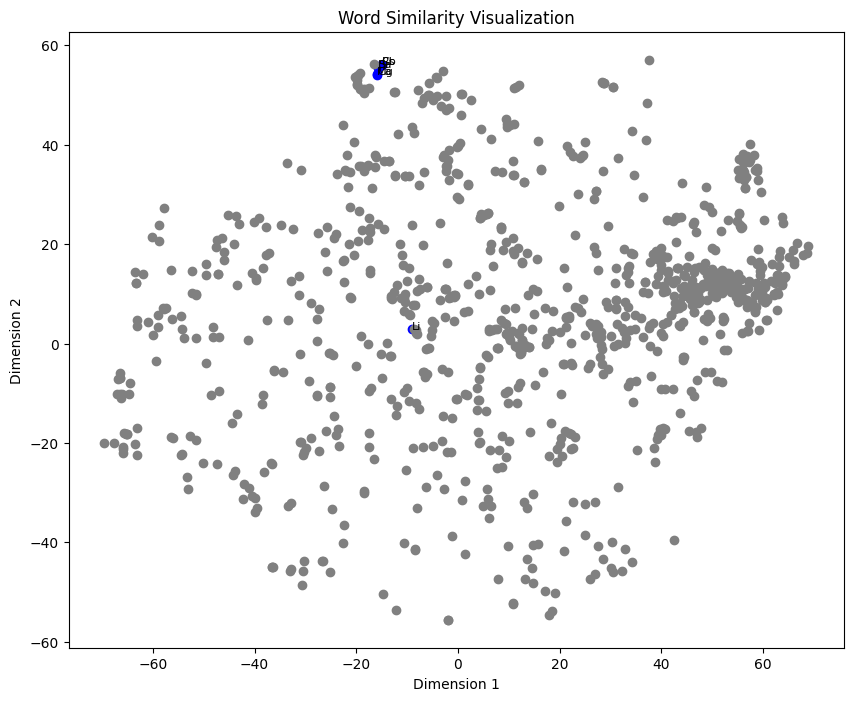

In [77]:
# 绘制散点图
plt.figure(figsize=(10, 8))

# 添加指定词语的标签并设置红色、灰色点
highlighted_words = ['Mg','Ca','Mg','Rb','Cs','Ba','Sr','Li']  # 指定要打印标签的词语
for i, word in enumerate(words):
    if word in highlighted_words:
        # 标记红色点
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color='blue')
        plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)
    else:
        # 标记灰色点
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color='gray')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Similarity Visualization')
plt.show()

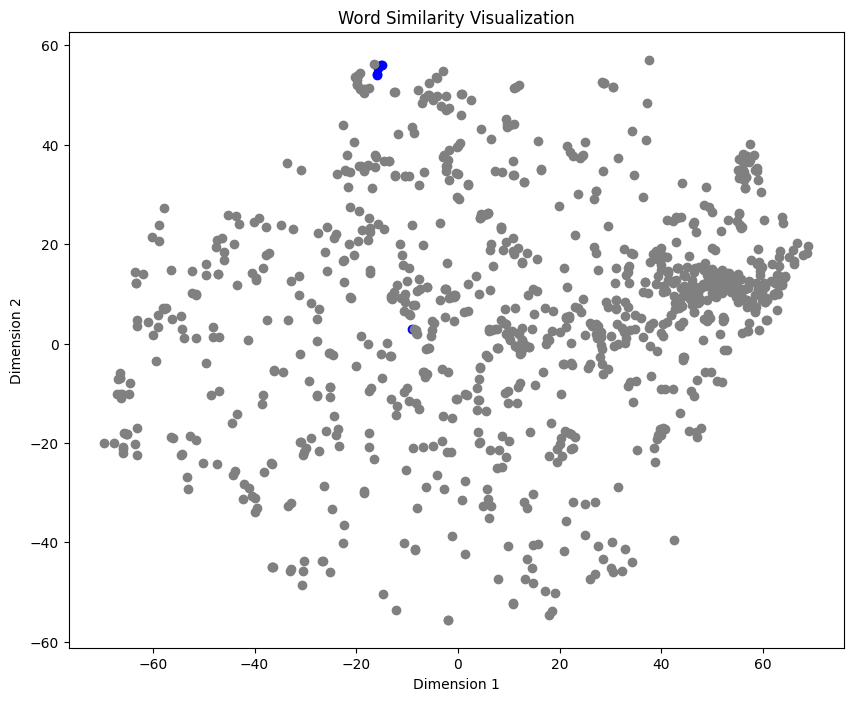

In [78]:
# 绘制散点图
plt.figure(figsize=(10, 8))

# 添加指定词语的标签并设置红色、灰色点
highlighted_words = ['Mg','Ca','Mg','Rb','Cs','Ba','Sr','Li']  # 指定要打印标签的词语
for i, word in enumerate(words):
    if word in highlighted_words:
        # 标记红色点
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color='blue')
        # plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)
    else:
        # 标记灰色点
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color='gray')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Similarity Visualization')
plt.show()